# Data Preparation

In [91]:
import pandas as pd

In [92]:
# saya menyimpan data saya dalam firebase google agar tidak perlu mengupload data lagi
df = pd.read_csv('https://firebasestorage.googleapis.com/v0/b/upload-firebase-rafli.appspot.com/o/heart.csv?alt=media&token=7e894c11-8685-4515-b5eb-1f17972c86e2')
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Konteks data:
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

# Cleansing data

mengubah nama kolom HeartDisease menjadi label

In [94]:
df.rename(columns = {'HeartDisease': 'label'}, inplace=True)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,label
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Menumerisasikan kategori menjadi angka

membuat helper function untuk mengkategorikan data teks menjadi angka

In [95]:
def helper_ecg(ecg):
  if ecg == "Normal":
    return 0
  elif ecg == "ST":
    return 1
  else:
    return 2

df['RestingECG'] = df["RestingECG"].apply(lambda x : helper_ecg(x))


mengubah data dalam RestingECG menjadi dalam format angka
- Normal = 0
- ST = 1
- LVH = 2

In [96]:
def helper_sex(sex):
  if sex == "M":
    return 0
  elif sex == "F":
    return 1

df['Sex'] = df["Sex"].apply(lambda x : helper_sex(x))
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,label
913,45,0,TA,110,264,0,0,132,N,1.2,Flat,1
914,68,0,ASY,144,193,1,0,141,N,3.4,Flat,1
915,57,0,ASY,130,131,0,0,115,Y,1.2,Flat,1
916,57,1,ATA,130,236,0,2,174,N,0.0,Flat,1
917,38,0,NAP,138,175,0,0,173,N,0.0,Up,0


mengubah data dalam Sex menjadi dalam format angka
- M = 0
- F = 1

In [97]:
def helper_cpt(cpt):
  if cpt == "TA":
    return 0
  elif cpt == "ATA":
    return 1
  elif cpt == "NAP":
    return 2
  elif cpt == "ASY":
    return 3


df['ChestPainType'] = df['ChestPainType'].apply(lambda x : helper_cpt(x))
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,label
913,45,0,0,110,264,0,0,132,N,1.2,Flat,1
914,68,0,3,144,193,1,0,141,N,3.4,Flat,1
915,57,0,3,130,131,0,0,115,Y,1.2,Flat,1
916,57,1,1,130,236,0,2,174,N,0.0,Flat,1
917,38,0,2,138,175,0,0,173,N,0.0,Up,0


mengubah data dalam ChestPainType menjadi dalam format angka
- TA = 0
- ATA = 1
- NAP = 2
- ASY = 3

In [98]:
def helper_ea(ea):
  if ea == "N":
    return 0
  elif ea == "Y":
    return 1


df['ExerciseAngina'] = df['ExerciseAngina'].apply(lambda x : helper_ea(x))
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,label
913,45,0,0,110,264,0,0,132,0,1.2,Flat,1
914,68,0,3,144,193,1,0,141,0,3.4,Flat,1
915,57,0,3,130,131,0,0,115,1,1.2,Flat,1
916,57,1,1,130,236,0,2,174,0,0.0,Flat,1
917,38,0,2,138,175,0,0,173,0,0.0,Up,0


mengubah data dalam ExerciseAngina menjadi dalam format angka
- No = 0
- Yes = 1

In [99]:
def helper_sts(sts):
  if sts == "Flat":
    return 0
  elif sts == "Up":
    return 1
  elif sts == "Down":
    return 2


df['ST_Slope'] = df['ST_Slope'].apply(lambda x : helper_sts(x))
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,label
913,45,0,0,110,264,0,0,132,0,1.2,0,1
914,68,0,3,144,193,1,0,141,0,3.4,0,1
915,57,0,3,130,131,0,0,115,1,1.2,0,1
916,57,1,1,130,236,0,2,174,0,0.0,0,1
917,38,0,2,138,175,0,0,173,0,0.0,1,0



mengubah data dalam ST_Slope menjadi dalam format angka
- Flat = 0
- Up = 1
- Down = 2

# Export data yang sudah bersih dan mengunggahnya ke Firebase agar data tersebut reusable

In [100]:
exporting_data = df.to_csv('clean-data-heart-disease.csv', index = False)
# upload data manual ke firebase

# Import Library yang digunakan

In [101]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns #import library seaborn untuk visualisasi
import matplotlib.pyplot as plt #import library matplotlib untuk visualisasi

# Import dan membagi data

In [102]:
data = pd.read_csv('https://firebasestorage.googleapis.com/v0/b/upload-firebase-rafli.appspot.com/o/clean-data-heart-disease.csv?alt=media&token=35852cb9-a20d-4f1d-8a95-ebc3008f404e')
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,label
913,45,0,0,110,264,0,0,132,0,1.2,0,1
914,68,0,3,144,193,1,0,141,0,3.4,0,1
915,57,0,3,130,131,0,0,115,1,1.2,0,1
916,57,1,1,130,236,0,2,174,0,0.0,0,1
917,38,0,2,138,175,0,0,173,0,0.0,1,0


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  label           918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


Konteks data:
- Age: age of the patient [years]
- Sex: sex of the patient [0: Male, 1: Female]
- ChestPainType: chest pain type [0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [0: Normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [0: No, 1: Yes]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [1: upsloping, 0: flat, 2: downsloping]
- label: output class [1: heart disease, 0: Normal]

In [104]:
data['label'].value_counts()

1    508
0    410
Name: label, dtype: int64

cek proporsi label. jika proporsinya terlalu jauh, dikhawatirkan hasil prediksinya akan buruk

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


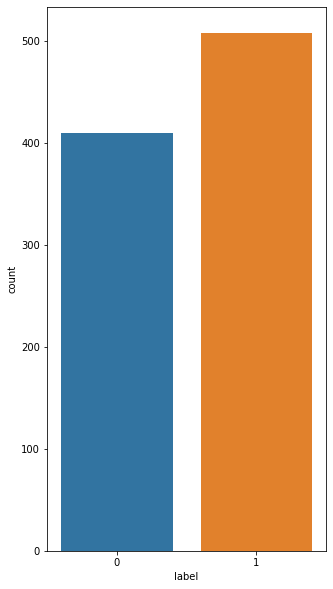

In [105]:
plt.figure(figsize=(5,10))
sns.countplot(data["label"])

proporsi data label tidak terlalu jauh sehingga data tersebut dapat dijadikan model machine learning

## Pemisahan data X dan y

- X merupakan variabel independen yang dapat mempengaruhi hasil heart disease
- Y adalah label

In [106]:
col_names = [column for column in data]
X = data[col_names[:-1]]
y = data[col_names[-1]]


pemisahan data dengan data training sebesar 75% dan random_state 10

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# Melatih data sekaligus mengecek akurasinya

In [108]:
# list diberi satu angka untuk mempermudah proses ranking karena nanti datanya akan dimulai dari 1
all_accuracy = [0]

for i in range(50):
  branch = i + 1
  dtc = DecisionTreeClassifier(criterion="entropy", max_depth=branch)
  dtc = dtc.fit(X_train, y_train) 
  y_pred = dtc.predict(X_test) 
  accuracy = metrics.accuracy_score(y_test, y_pred)
  print("Accuracy branch ke-",branch, accuracy)
  all_accuracy.append(accuracy)

Accuracy branch ke- 1 0.7521739130434782
Accuracy branch ke- 2 0.7782608695652173
Accuracy branch ke- 3 0.7739130434782608
Accuracy branch ke- 4 0.8217391304347826
Accuracy branch ke- 5 0.7652173913043478
Accuracy branch ke- 6 0.7739130434782608
Accuracy branch ke- 7 0.7913043478260869
Accuracy branch ke- 8 0.7521739130434782
Accuracy branch ke- 9 0.7739130434782608
Accuracy branch ke- 10 0.7565217391304347
Accuracy branch ke- 11 0.7869565217391304
Accuracy branch ke- 12 0.7739130434782608
Accuracy branch ke- 13 0.7695652173913043
Accuracy branch ke- 14 0.7565217391304347
Accuracy branch ke- 15 0.7782608695652173
Accuracy branch ke- 16 0.7869565217391304
Accuracy branch ke- 17 0.7521739130434782
Accuracy branch ke- 18 0.7608695652173914
Accuracy branch ke- 19 0.7782608695652173
Accuracy branch ke- 20 0.7695652173913043
Accuracy branch ke- 21 0.7782608695652173
Accuracy branch ke- 22 0.7695652173913043
Accuracy branch ke- 23 0.7608695652173914
Accuracy branch ke- 24 0.7695652173913043
A

mencari nilai maksimal dan kedalaman batang dari nilai maksimal


In [109]:
max_value = max(all_accuracy)
depth_branch = all_accuracy.index(max_value)
print(max_value, depth_branch)

0.8217391304347826 4


# Akurasi tertinggi

In [110]:
print("Akurasi tertinggi terletak pada kedalaman branch ke-"+ str(depth_branch)+" dengan nilai "+ str(max_value))

Akurasi tertinggi terletak pada kedalaman branch ke-4 dengan nilai 0.8217391304347826
